University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

## Import data

In [2]:
df_dict = read_data('../dat/gain-comparison/gain-comp/avg_gain')

Berlin Hbf
Bremen Hbf
Dortmund Hbf
Dresden Hbf
Duesseldorf Hbf
Duisburg Hbf
Erfurt Hbf
Essen Hbf
Hamburg Hbf
Hannover Hbf
Karlsruhe Hbf
Kiel Hbf
Koeln Hbf
Leipzig Hbf
Magdeburg Hbf
Mainz Hbf
Muenchen Hbf
Nuernberg Hbf
Potsdam Hbf
Saarbruecken Hbf
Schwerin Hbf
Stuttgart Hbf
Wiesbaden Hbf


In [3]:
df_dict = {}
folder_path = '../dat/gain-comparison/gain-comp/avg_gain'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        

        key = filename.split('_')[2].replace(".json", "")

        key = key.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

        df = pd.read_json(file_path, orient='index')
        df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
        print(key)
        df_dict[key] = df

print(df_dict['Berlin Hbf'])

Berlin Hbf
Bremen Hbf
Dortmund Hbf
Dresden Hbf
Duesseldorf Hbf
Duisburg Hbf
Erfurt Hbf
Essen Hbf
Hamburg Hbf
Hannover Hbf
Karlsruhe Hbf
Kiel Hbf
Koeln Hbf
Leipzig Hbf
Magdeburg Hbf
Mainz Hbf
Muenchen Hbf
Nuernberg Hbf
Potsdam Hbf
Saarbruecken Hbf
Schwerin Hbf
Stuttgart Hbf
Wiesbaden Hbf
                                                        switch time  \
Mainz Hbf         [50.0, 50.0, 50.0, 50.0, 46.0, 46.0, 50.0, 50....   
Koeln Hbf         [34.0, 34.0, 46.0, 46.0, 46.0, 46.0, 46.0, 10....   
Wiesbaden Hbf     [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....   
Dortmund Hbf      [46.0, 13.0, 30.0, 13.0, 30.0, 46.0, 13.0, 30....   
Essen Hbf         [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Duisburg Hbf      [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Stuttgart Hbf     [28.0, 28.0, 28.0, 54.0, 54.0, 28.0, 28.0, 28....   
Saarbruecken Hbf  [52.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....   
Duesseldorf Hbf   [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Ka

In [3]:

df_mean_delays = get_mean_delays(df_dict)['avg_gain']
switch_times_array = list(range(1,61,1))
df_mean_delays["switch_times"] = switch_times_array
print(df_mean_delays)

    mean_delay reachable1 reachable2 reachable3  switch_times
1        71.92        127        178        187             1
2        55.54        133        181        179             2
3        59.96        108        168        177             3
4        65.34         80        161        150             4
5        50.82        127        173        175             5
6        61.08        146        174        176             6
7        45.43        100        162        175             7
8        42.76         85        144        165             8
9        43.17        125        163        179             9
10       37.88        134        165        184            10
11       44.25         98        144        185            11
12       44.57        132        168        190            12
13       37.02        123        147        174            13
14       28.54        130        167        188            14
15       39.26        119        151        185            15
16      

## Mean Delay for each switch time 

### Plot

12


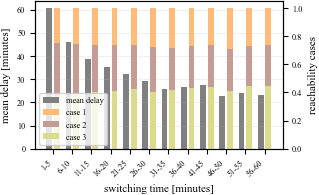

In [5]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
#plt.rcdefaults()
# Generate grouped Data

group_size = 5  # set group size 

grouped_mean_delays = []
#grouped_median_delays = []
grouped_reachable1 = []
grouped_reachable2 = []
grouped_reachable3 = []

for i in range(0, len(df_mean_delays.switch_times), group_size):
    group_sum_mean_delays = np.sum(df_mean_delays.mean_delay[i:i+group_size])
    grouped_mean_delays.append(group_sum_mean_delays)

    #group_sum_median_delays = np.sum(df_mean_delays.median_delay[i:i+group_size])
    #grouped_median_delays.append(group_sum_mean_delays)

    group_sum_reachable1 = np.sum(df_mean_delays.reachable1[i:i+group_size])
    grouped_reachable1.append(group_sum_reachable1)

    group_sum_reachable2 = np.sum(df_mean_delays.reachable2[i:i+group_size])
    grouped_reachable2.append(group_sum_reachable2)

    group_sum_reachable3 = np.sum(df_mean_delays.reachable3[i:i+group_size])
    grouped_reachable3.append(group_sum_reachable3)



print(len(grouped_mean_delays))
x = np.arange(len(grouped_mean_delays))

y_ticks_array = np.arange(0, max(grouped_mean_delays)/group_size+1, 10)



# FIGURE ------------------------------

fig, ax1 = plt.subplots()

width = 0.3
ax1.bar(x+1-0.2, np.array(grouped_mean_delays)/group_size, width, color="grey", label="mean delay")
#ax1.bar(x+1-0.2, np.array(grouped_median_delays)/group_size, width, color='black', alpha=0.2, label="median delay")

#ax1.set_title('Mean Delay in Minutes and distribution of reachability cases \n depending on the switch time in minutes in Frankfurt Hbf \nusing subset data')
ax1.set_xlabel('transfer time [min]')
ax1.set_ylabel('mean delay [min]')
#xticks_array =  [f'{start}\n-\n{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
#ax1.set_xticks(x+1, xticks_array)
ax1.set_yticks(y_ticks_array)
ax1.yaxis.grid("major", alpha=0.2)
xticks_array =  [f'{start}-{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
ax1.set_xticks(x + 1)
ax1.set_xticklabels(xticks_array, rotation=45, ha='right')  # Rotate labels and set horizontal alignment

# ... [rest of your code] ...

#plt.show()



ax2 = ax1.twinx()

bottom = np.zeros(len(grouped_mean_delays))

reachables_total = np.array(grouped_reachable1) + np.array(grouped_reachable2) + np.array(grouped_reachable3)
bar1 = np.array(grouped_reachable1)/reachables_total
bar2 = np.array(grouped_reachable2)/reachables_total
bar3 = np.array(grouped_reachable3)/reachables_total

ax2.bar(x+1+0.2, bar1, width, color="#FFBB78", label="case 1", bottom=bottom+bar2+bar3)
ax2.bar(x+1+0.2, bar2, width, color="#C49C94", label="case 2", bottom=bottom+bar3)
ax2.bar(x+1+0.2, bar3, width, color="#DBDB8D", label="case 3", bottom=bottom)

#ax2.set_yscale()
ax2.set_ylabel('reachability cases')


# Solution for having two legends
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(bars1 + bars2, labels1 + labels2, loc="lower left")

plt.savefig("plot_meanDelay_reachability_switchTime.pdf", format="pdf")

plt.show()